# Import

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Oa\Career Foundry'

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', '4.9_part_1.pkl'))

# Exercise

## Exploring data

In [4]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_hour_of_day,prices,loyalty_flag,Age,n_dependants,fam_status,income,_merge
1576,912404,17,14,14900.0,Regular customer,39,3,married,150659,both
1638,603376,17,16,14900.0,Regular customer,39,3,married,150659,both
16532,3264360,135,21,14900.0,New customer,30,3,married,120635,both
16538,892534,135,8,14900.0,New customer,30,3,married,120635,both
53710,229704,342,19,14900.0,Regular customer,56,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...
32349781,3172853,205650,9,14900.0,Regular customer,62,0,divorced/widowed,302526,both
32377014,2504315,205818,15,14900.0,Regular customer,60,1,married,172539,both
32377024,1108388,205818,5,14900.0,Regular customer,60,1,married,172539,both
32409856,1916142,206049,17,14900.0,New customer,23,1,married,169022,both


In [5]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

#remove the data with prices over 100 dollars

In [6]:
columns =df_ords_prods_merge.columns
print(columns)

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'Age', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')


## order hour of day

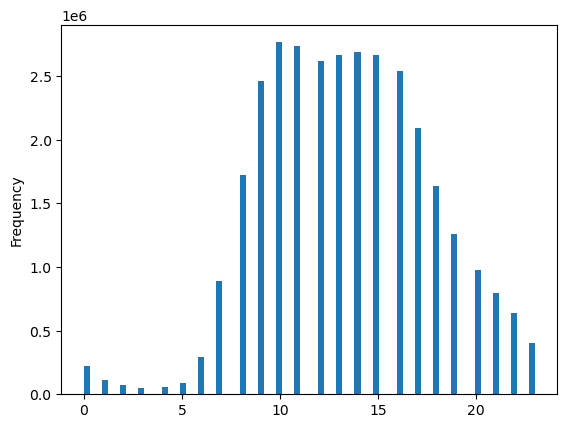

In [11]:
hist = df_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 75)

In [ ]:
# this histogram shows most orders happen after 8 am and start to really decrease around 5 pm

## customer tag

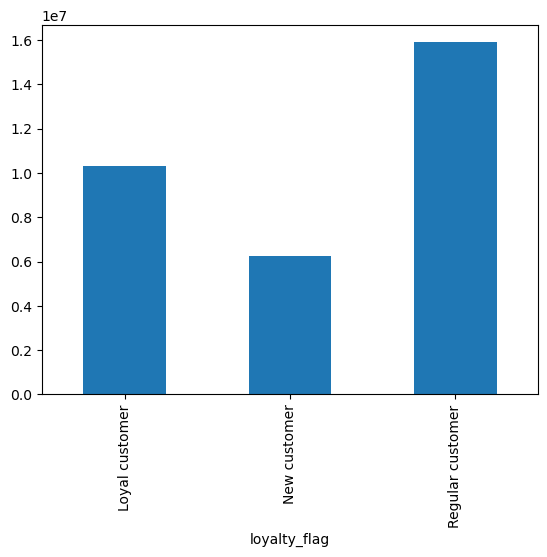

In [49]:
tag=df_ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

## sampling

In [7]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [8]:
big = df_ords_prods_merge[dev]

In [9]:
small = df_ords_prods_merge[~dev]

In [10]:
len(df_ords_prods_merge)

32434212

In [11]:
len(big) + len(small)

32434212

In [12]:
df_2 = small[['order_hour_of_day','prices']]

## price and order hour of day line chart

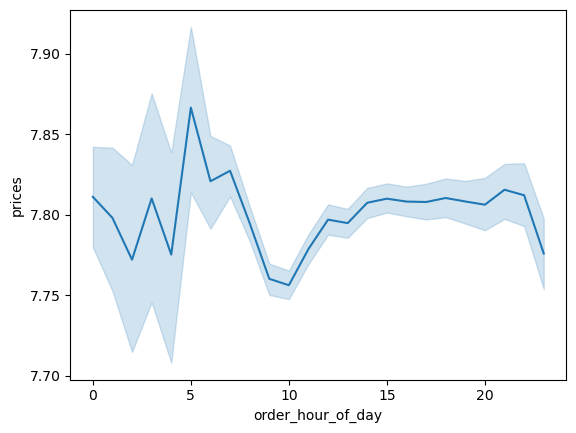

In [13]:
line_pr_ohod = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [24]:
df_3 = small[['Age','n_dependants']]

## age and dependants line chart

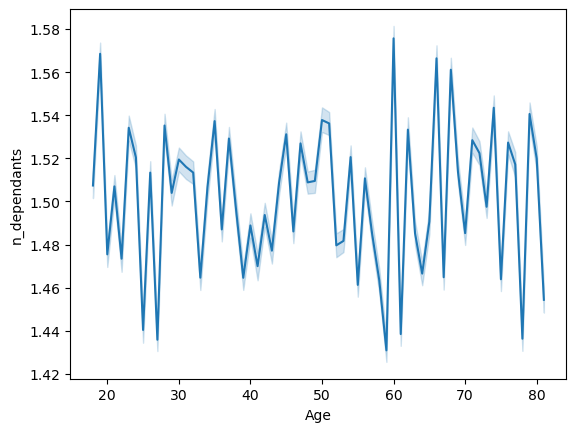

In [25]:
line = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

In [ ]:
#there seems to be no coralation betwen age and family situation. the chart seems to be all over the place an no consistence pattern

## age and income scatter plot

In [42]:
df_4 = small[['Age','income']]

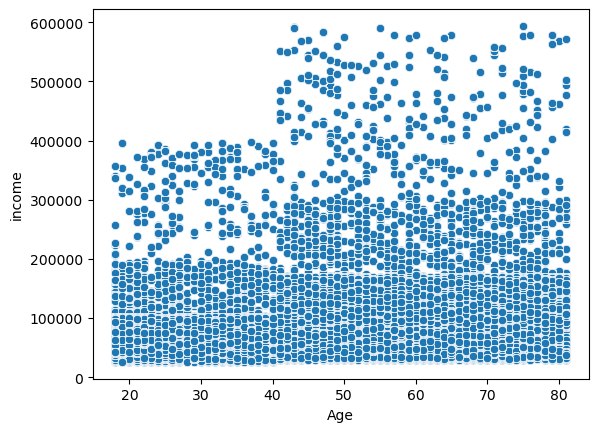

In [44]:
scatter=sns.scatterplot(x = 'Age', y = 'income',data = df_4)

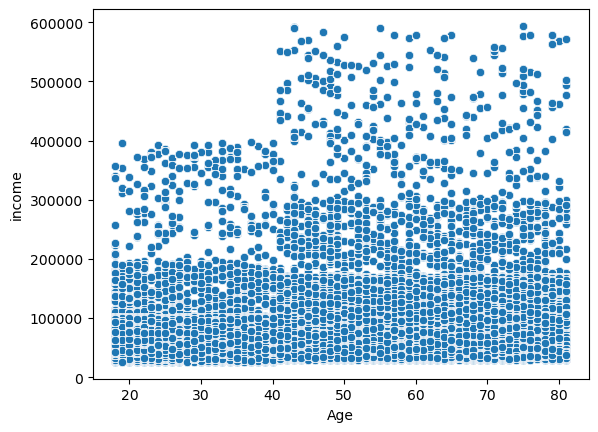

In [40]:
scatter=sns.scatterplot(x = 'Age', y = 'income',data = df_ords_prods_merge)

## exporting

In [45]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_plot_age_dependants_small_sample.png'))

In [15]:
line_pr_ohod.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_plot_ohod_price_sample.png'))

In [47]:
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_plot_income_price_sample.png'))

In [48]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'historgraph_order_hour_of_day.png'))

In [50]:
tag.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_chart_customer_tags.png'))